In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import folium
import geopandas as gpd
from datetime import datetime

In [13]:
# Windows용 한글 폰트 오류 해결
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc("font", family = font_name)
# font_name = "내가 사용하고자 하는 글꼴"

In [3]:
df = pd.read_excel("./data/지하철1km종사자수_인구수_도넛.xlsx")

In [4]:
df.head()

,지하철역,종사자수,거주인구수
0,까치산,12240,79617
1,화곡,9265,68622
2,미아사거리,12186,65471
3,신정네거리,15095,62872
4,응암,10756,61704


In [5]:
df.shape

(299, 3)

In [6]:
df.isna().sum()

지하철역     0
종사자수     0
거주인구수    0
dtype: int64

# 출근시간

In [7]:
df[["지하철역", "종사자수"]].sort_values("종사자수", ascending = False)

,지하철역,종사자수
87,남구로,82350
27,구로디지털단지,78560
62,양재(서초구청),72053
144,선릉,66096
145,가산디지털단지,63796
...,...,...
283,북한산우이,629
186,개포동,618
265,무악재,486
296,개화,276


In [11]:
bicy = pd.read_csv("./data/역별_따릉이_총거치대수.csv")

In [12]:
bicy.head()

,지하철역,거치대수
0,4.19민주묘지,27.0
1,가락시장,85.0
2,가산디지털단지,40.0
3,가양,59.0
4,가오리,53.0


In [14]:
bicy = bicy.set_index("지하철역")

In [15]:
df = df.set_index("지하철역")

In [16]:
ds_balance = pd.concat([df, bicy], axis = 1)

In [17]:
ds_balance.head()

,종사자수,거주인구수,거치대수
지하철역,,,
까치산,12240,79617,30.0
화곡,9265,68622,53.0
미아사거리,12186,65471,20.0
신정네거리,15095,62872,58.0
응암,10756,61704,30.0


In [18]:
# 출근시간대 적정 따릉이수 컬럼
# 24년 지하철 이용비율: 30% (24년 기사)
ds_balance["출근_적정따릉이수"] = round(ds_balance["종사자수"] * 0.3 * 0.01)

In [20]:
ds_balance_lst = []
for i in range(len(ds_balance)):
    # 공급부족
    if (ds_balance.iloc[i]["출근_적정따릉이수"] - ds_balance.iloc[i]["거치대수"] > ds_balance.iloc[i]["출근_적정따릉이수"] * 0.25):
        ds_balance_lst.append("공급부족")
    elif ds_balance.iloc[i]["거치대수"] - ds_balance.iloc[i]["출근_적정따릉이수"] > ds_balance.iloc[i]["출근_적정따릉이수"] * 0.25:
        ds_balance_lst.append("공급과잉")
    else:
        ds_balance_lst.append("공급적정")     

In [21]:
ds_balance["출근_수요공급균형"] = ds_balance_lst

In [22]:
# 퇴근시간대 적정 따릉이수 컬럼
# 24년 경제활동인구비율 통계: 65%, 지하철 이용비율: 30%
ds_balance["퇴근_적정따릉이수"] = round(ds_balance["종사자수"] * 0.65 * 0.3 * 0.01)

In [24]:
ds_balance_lst = []
for i in range(len(ds_balance)):
    # 공급부족
    if (ds_balance.iloc[i]["퇴근_적정따릉이수"] - ds_balance.iloc[i]["거치대수"] > ds_balance.iloc[i]["퇴근_적정따릉이수"] * 0.25):
        ds_balance_lst.append("공급부족")
    elif ds_balance.iloc[i]["거치대수"] - ds_balance.iloc[i]["퇴근_적정따릉이수"] > ds_balance.iloc[i]["퇴근_적정따릉이수"] * 0.25:
        ds_balance_lst.append("공급과잉")
    else:
        ds_balance_lst.append("공급적정")   

In [25]:
ds_balance["퇴근_수요공급균형"] = ds_balance_lst

In [26]:
ds_balance.head()

,종사자수,거주인구수,거치대수,출근_적정따릉이수,출근_수요공급균형,퇴근_적정따릉이수,퇴근_수요공급균형
지하철역,,,,,,,
까치산,12240,79617,30.0,37.0,공급적정,24.0,공급적정
화곡,9265,68622,53.0,28.0,공급과잉,18.0,공급과잉
미아사거리,12186,65471,20.0,37.0,공급부족,24.0,공급적정
신정네거리,15095,62872,58.0,45.0,공급과잉,29.0,공급과잉
응암,10756,61704,30.0,32.0,공급적정,21.0,공급과잉


In [29]:
ds_balance.to_csv("./data/출퇴근따릉이_수요공급균형_도넛.csv")

In [4]:
ds_balance = pd.read_csv("./data/따릉이_수요공급/출퇴근따릉이_수요공급균형_도넛.csv")

In [5]:
ds_balance.head()

,지하철역,종사자수,거주인구수,거치대수,출근_적정따릉이수,출근_수요공급균형,퇴근_적정따릉이수,퇴근_수요공급균형
0,까치산,12240,79617,30.0,37.0,공급적정,24.0,공급적정
1,화곡,9265,68622,53.0,28.0,공급과잉,18.0,공급과잉
2,미아사거리,12186,65471,20.0,37.0,공급부족,24.0,공급적정
3,신정네거리,15095,62872,58.0,45.0,공급과잉,29.0,공급과잉
4,응암,10756,61704,30.0,32.0,공급적정,21.0,공급과잉


In [9]:
ds_balance.sort_values("출근_적정따릉이수").head(20)

,지하철역,종사자수,거주인구수,거치대수,출근_적정따릉이수,출근_수요공급균형,퇴근_적정따릉이수,퇴근_수요공급균형
297,을지로입구,161,257,114.0,0.0,공급과잉,0.0,공급과잉
296,개화,276,304,20.0,1.0,공급과잉,1.0,공급과잉
265,무악재,486,7040,18.0,1.0,공급과잉,1.0,공급과잉
270,먹골,768,6094,56.0,2.0,공급과잉,1.0,공급과잉
283,북한산우이,629,2754,20.0,2.0,공급과잉,1.0,공급과잉
249,당고개,734,10321,35.0,2.0,공급과잉,1.0,공급과잉
246,청구,779,10676,12.0,2.0,공급과잉,2.0,공급과잉
240,잠원,704,11312,15.0,2.0,공급과잉,1.0,공급과잉
220,대모산입구,744,13909,40.0,2.0,공급과잉,1.0,공급과잉
223,보라매,660,13585,55.0,2.0,공급과잉,1.0,공급과잉


In [12]:
ds_balance[ds_balance["지하철역"] == "종각"]

,지하철역,종사자수,거주인구수,거치대수,출근_적정따릉이수,출근_수요공급균형,퇴근_적정따릉이수,퇴근_수요공급균형
298,종각,2297,39,65.0,7.0,공급과잉,4.0,공급과잉


In [13]:
ds_balance["출근_수요공급균형"].value_counts()

출근_수요공급균형
공급과잉    202
공급부족     59
공급적정     38
Name: count, dtype: int64

In [4]:
ds_balance = pd.read_csv("./data/따릉이_수요공급/출퇴근따릉이_수요공급균형_도넛.csv")

In [5]:
ds_balance

,지하철역,종사자수,거주인구수,거치대수,출근_적정따릉이수,출근_수요공급균형,퇴근_적정따릉이수,퇴근_수요공급균형
0,까치산,12240,79617,30.0,37.0,공급적정,24.0,공급적정
1,화곡,9265,68622,53.0,28.0,공급과잉,18.0,공급과잉
2,미아사거리,12186,65471,20.0,37.0,공급부족,24.0,공급적정
3,신정네거리,15095,62872,58.0,45.0,공급과잉,29.0,공급과잉
4,응암,10756,61704,30.0,32.0,공급적정,21.0,공급과잉
...,...,...,...,...,...,...,...,...
294,을지로3가,1454,692,43.0,4.0,공급과잉,3.0,공급과잉
295,남태령,1616,349,10.0,5.0,공급과잉,3.0,공급과잉
296,개화,276,304,20.0,1.0,공급과잉,1.0,공급과잉
297,을지로입구,161,257,114.0,0.0,공급과잉,0.0,공급과잉


In [6]:
go = ds_balance[["지하철역", "종사자수", "거치대수", "출근_적정따릉이수", "출근_수요공급균형"]]

In [7]:
leave = ds_balance[["지하철역", "거주인구수", "거치대수", "퇴근_적정따릉이수", "퇴근_수요공급균형"]]

In [8]:
go.head()

,지하철역,종사자수,거치대수,출근_적정따릉이수,출근_수요공급균형
0,까치산,12240,30.0,37.0,공급적정
1,화곡,9265,53.0,28.0,공급과잉
2,미아사거리,12186,20.0,37.0,공급부족
3,신정네거리,15095,58.0,45.0,공급과잉
4,응암,10756,30.0,32.0,공급적정


In [33]:
minus = go[go["출근_수요공급균형"] == "공급부족"]

In [35]:
minus["부족따릉이수"] = minus["출근_적정따릉이수"] - minus["거치대수"]

C:\Users\Woojung\AppData\Local\Temp\ipykernel_15408\4252444202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minus["부족따릉이수"] = minus["출근_적정따릉이수"] - minus["거치대수"]


In [36]:
minus.head()

,지하철역,종사자수,거치대수,출근_적정따릉이수,출근_수요공급균형,부족따릉이수
2,미아사거리,12186,20.0,37.0,공급부족,17.0
11,북한산보국문,8837,10.0,27.0,공급부족,17.0
12,대림(구로구청),57876,20.0,174.0,공급부족,154.0
13,건대입구,32035,54.0,96.0,공급부족,42.0
14,신풍,9468,10.0,28.0,공급부족,18.0


In [31]:
minus = minus.drop("차이", axis = 1)

In [37]:
minus.sort_values("부족따릉이수", ascending = False).head()

,지하철역,종사자수,거치대수,출근_적정따릉이수,출근_수요공급균형,부족따릉이수
87,남구로,82350,10.0,247.0,공급부족,237.0
144,선릉,66096,8.0,198.0,공급부족,190.0
27,구로디지털단지,78560,62.0,236.0,공급부족,174.0
12,대림(구로구청),57876,20.0,174.0,공급부족,154.0
145,가산디지털단지,63796,40.0,191.0,공급부족,151.0


In [41]:
plus = go[go["출근_수요공급균형"] == "공급과잉"]

In [42]:
plus["잉여따릉이수"] = plus["거치대수"] - plus["출근_적정따릉이수"]

C:\Users\Woojung\AppData\Local\Temp\ipykernel_15408\2341157669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plus["잉여따릉이수"] = plus["거치대수"] - plus["출근_적정따릉이수"]


In [43]:
plus.sort_values("잉여따릉이수", ascending = False).head()

,지하철역,종사자수,거치대수,출근_적정따릉이수,출근_수요공급균형,잉여따릉이수
231,마곡나루(서울식물원),15619,192.0,47.0,공급과잉,145.0
297,을지로입구,161,114.0,0.0,공급과잉,114.0
278,여의도,14151,152.0,42.0,공급과잉,110.0
123,마곡,15396,138.0,46.0,공급과잉,92.0
288,광화문(세종문화회관),6277,107.0,19.0,공급과잉,88.0


In [55]:
go.sort_values("출근_적정따릉이수", ascending = False).head()

,지하철역,종사자수,거치대수,출근_적정따릉이수,출근_수요공급균형
87,남구로,82350,10.0,247.0,공급부족
27,구로디지털단지,78560,62.0,236.0,공급부족
62,양재(서초구청),72053,78.0,216.0,공급부족
144,선릉,66096,8.0,198.0,공급부족
145,가산디지털단지,63796,40.0,191.0,공급부족


In [56]:
go.sort_values("출근_적정따릉이수", ascending = False).tail()

,지하철역,종사자수,거치대수,출근_적정따릉이수,출근_수요공급균형
186,개포동,618,40.0,2.0,공급과잉
283,북한산우이,629,20.0,2.0,공급과잉
296,개화,276,20.0,1.0,공급과잉
265,무악재,486,18.0,1.0,공급과잉
297,을지로입구,161,114.0,0.0,공급과잉


In [9]:
leave.head()

,지하철역,거주인구수,거치대수,퇴근_적정따릉이수,퇴근_수요공급균형
0,까치산,79617,30.0,24.0,공급적정
1,화곡,68622,53.0,18.0,공급과잉
2,미아사거리,65471,20.0,24.0,공급적정
3,신정네거리,62872,58.0,29.0,공급과잉
4,응암,61704,30.0,21.0,공급과잉


In [44]:
minus = leave[leave["퇴근_수요공급균형"] == "공급부족"]

In [45]:
minus["부족따릉이수"] = minus["퇴근_적정따릉이수"] - minus["거치대수"]

C:\Users\Woojung\AppData\Local\Temp\ipykernel_15408\1614904844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minus["부족따릉이수"] = minus["퇴근_적정따릉이수"] - minus["거치대수"]


In [46]:
minus.sort_values("부족따릉이수", ascending = False).head()

,지하철역,거주인구수,거치대수,퇴근_적정따릉이수,퇴근_수요공급균형,부족따릉이수
87,남구로,32174,10.0,161.0,공급부족,151.0
144,선릉,23333,8.0,129.0,공급부족,121.0
12,대림(구로구청),55279,20.0,113.0,공급부족,93.0
27,구로디지털단지,47301,62.0,153.0,공급부족,91.0
145,가산디지털단지,23328,40.0,124.0,공급부족,84.0


In [47]:
plus = leave[leave["퇴근_수요공급균형"] == "공급과잉"]

In [48]:
plus["잉여따릉이수"] = plus["거치대수"] - plus["퇴근_적정따릉이수"]

C:\Users\Woojung\AppData\Local\Temp\ipykernel_15408\4191271004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plus["잉여따릉이수"] = plus["거치대수"] - plus["퇴근_적정따릉이수"]


In [49]:
plus.sort_values("잉여따릉이수", ascending = False).head()

,지하철역,거주인구수,거치대수,퇴근_적정따릉이수,퇴근_수요공급균형,잉여따릉이수
231,마곡나루(서울식물원),12630,192.0,30.0,공급과잉,162.0
278,여의도,4478,152.0,28.0,공급과잉,124.0
297,을지로입구,257,114.0,0.0,공급과잉,114.0
123,마곡,26475,138.0,30.0,공급과잉,108.0
85,발산,32647,147.0,40.0,공급과잉,107.0


In [10]:
sr = go["출근_수요공급균형"].value_counts()

In [11]:
sr2 = leave["퇴근_수요공급균형"].value_counts()

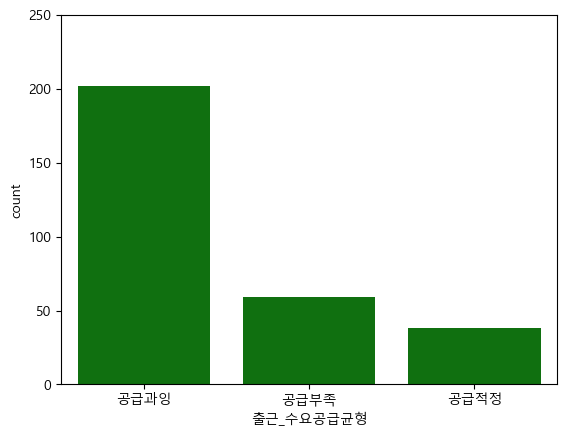

In [15]:
sns.barplot(sr, color = "g")

plt.ylim(0, 250)

plt.show()

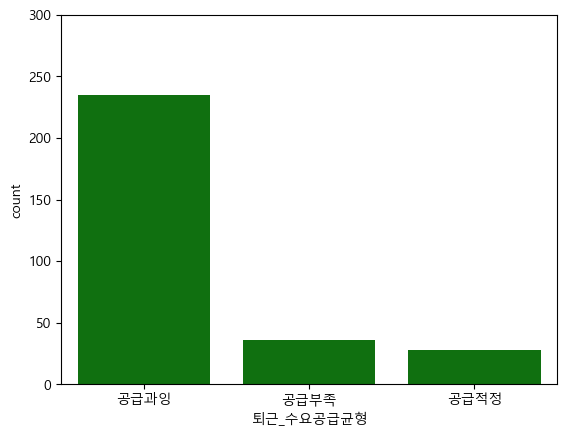

In [17]:
sns.barplot(sr2, color = "g")

plt.ylim(0, 300)

plt.show()